# Домашнее задание по теме: выбросы (outliers)

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
!where pip

C:\Anaconda3\envs\one\Scripts\pip.exe


In [2]:
# !conda install pandas matplotlib numpy seaborn scipy -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import seaborn as sns

sns.__version__

'0.11.1'

In [6]:
import scipy
from scipy import stats

scipy.__version__

'1.6.1'

In [7]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [8]:
# загрузить датасет в pandas dataframe
df=pd.read_csv('hotel_bookings.csv')

# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Графическое представление выбросов

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

1. С помощью `boxplot` (пакет `seaborn`) показать, где имеются выбросы. Можно реализовать это любым удобным способом.

1. Сделать выводы по этим изображениям: 
    - Есть ли выбросы?
    - Если есть, то в каких колонках?

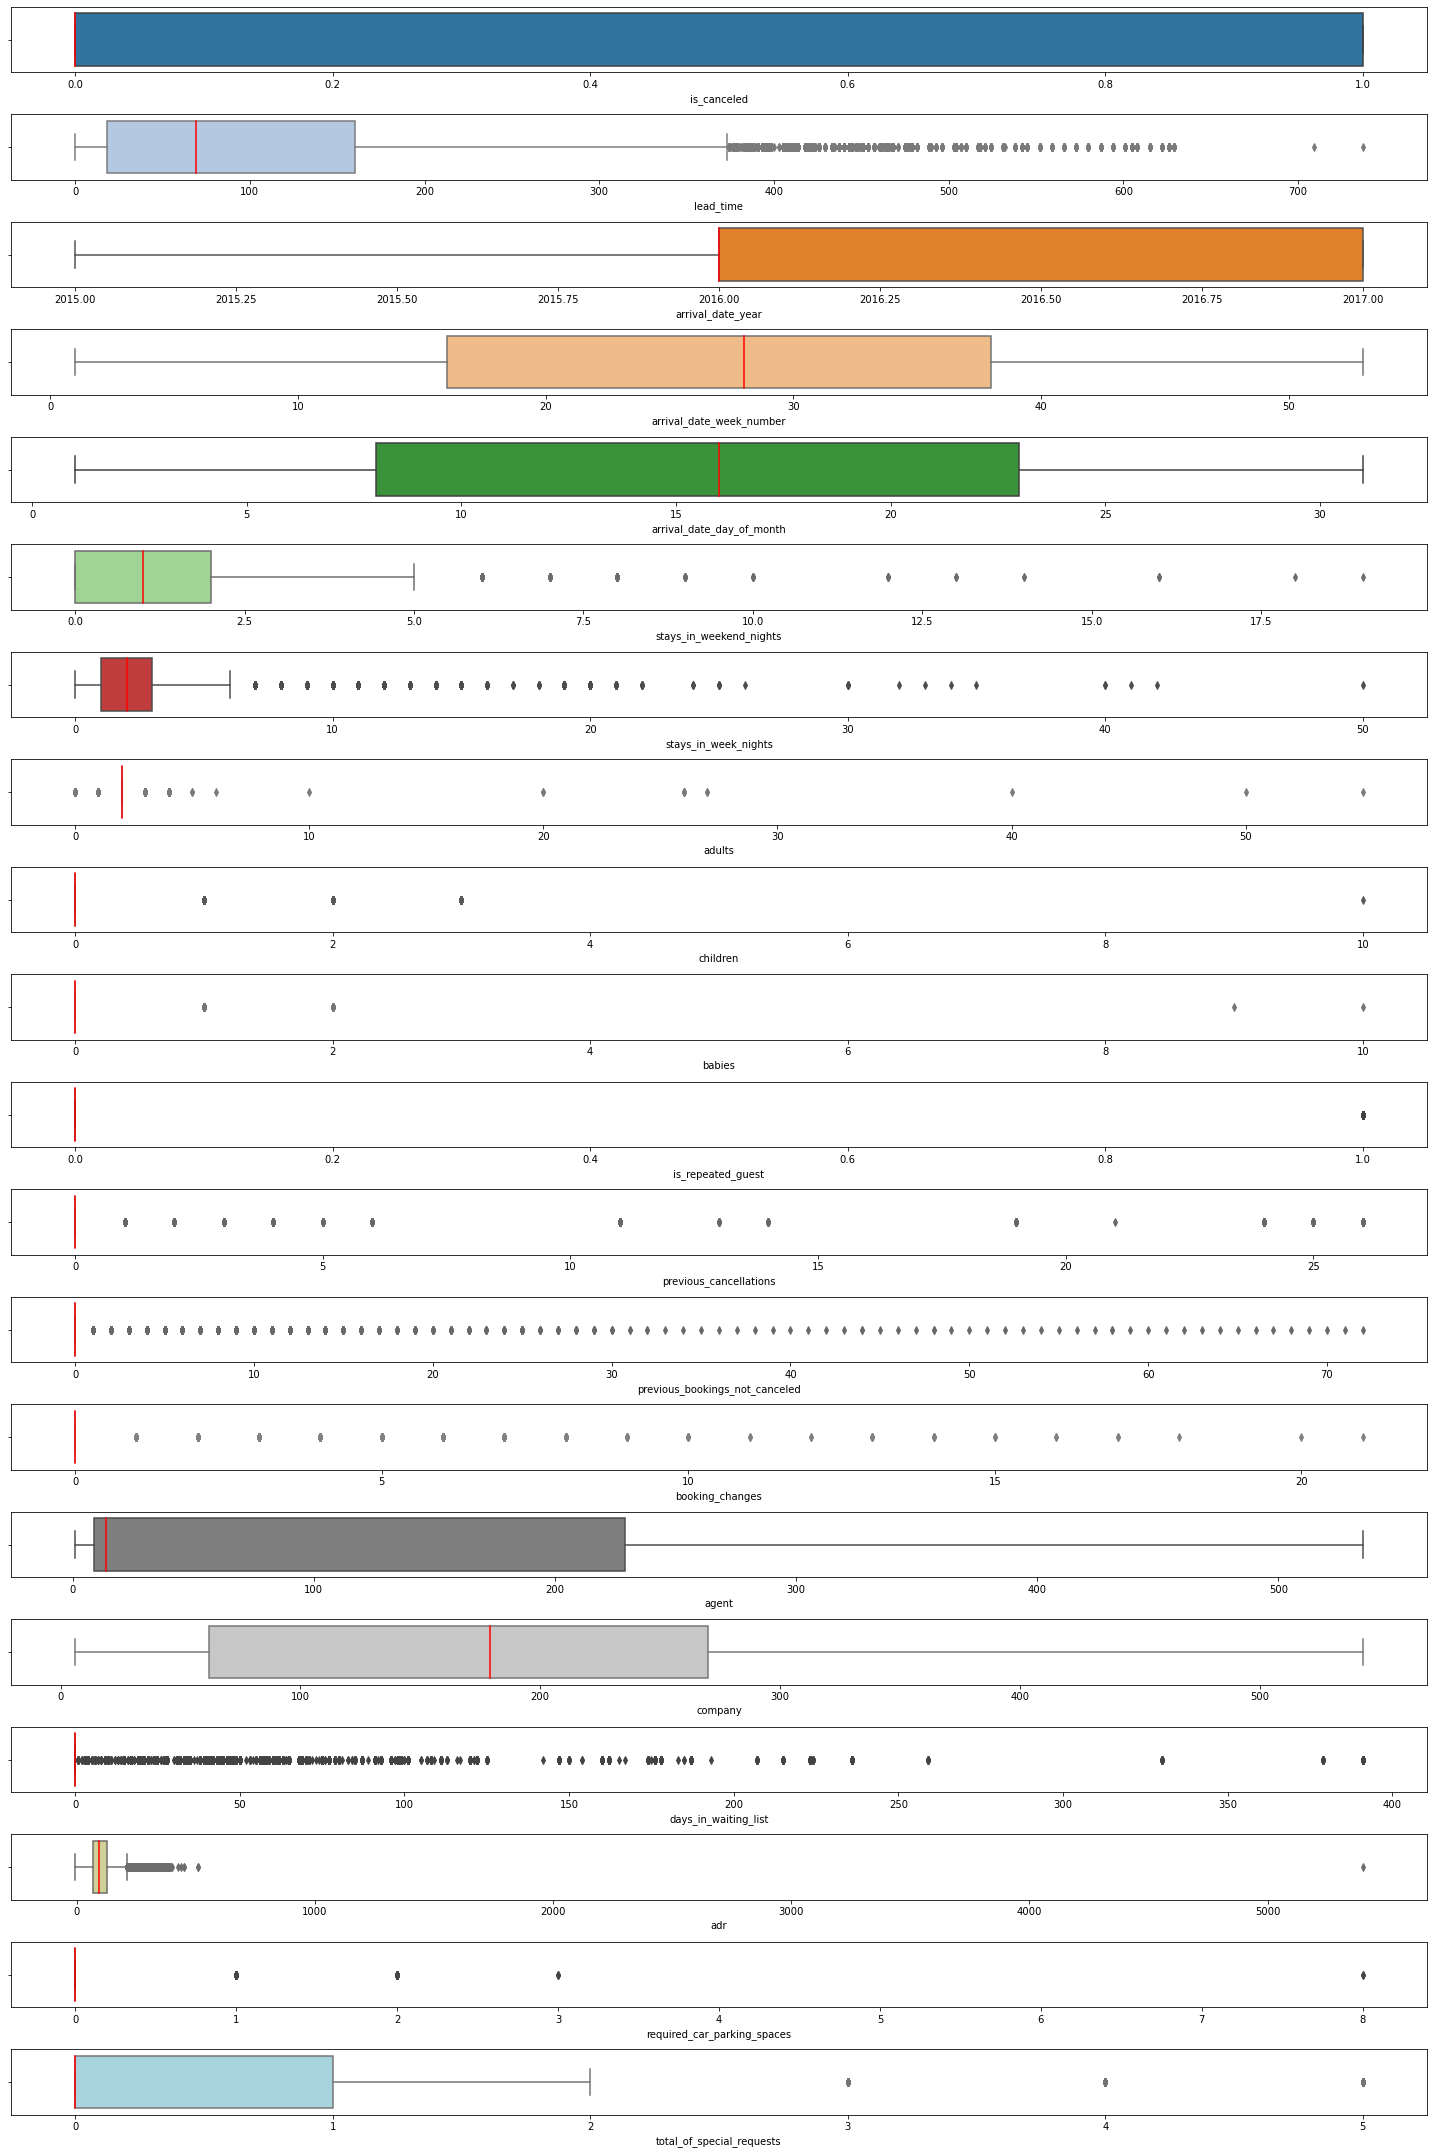

In [9]:
df_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols = len(df_cols)

fig, axs = plt.subplots(numeric_cols, 1, figsize=(20, 30))

cmap = plt.get_cmap('tab20')

for index, column_name in enumerate(df_cols):
    c = cmap(index/numeric_cols)
    
    sns.boxplot(x=df[column_name], ax=axs[index], color=c)
    axs[index].get_lines()[4].set_color('red')
    
fig.tight_layout(pad=1.0)

In [10]:
# Выбросы есть в колонках: 
#    lead_time
#    stays_in_weekend_nights
#    stays_in_week_nights
#    adults
#    children
#    babies
#    is_repeated_guest
#    previous_cancellations
#    previous_bookings_not_canceled
#    booking_changes
#    days_in_waiting_list
#    adr
#    required_car_parking_spaces
#    total_of_special_requests

## Обнаружение и удаление выбросов

### Способ основанный на межквартильном расстоянии (Interquartile range = IQR, Tukey's fences)

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

1. Выбрать одну или несколько колонок содержащих выбросы.

1. Для каждой из этих колонок удалить выбросы, и сохранить результат в новую переменную.

1. Вычислить сколько значений при этом было удалено.

1. Нарисовать `boxplot` на котором изображен исходный вариант для колонки и вариант без выбросов. Ниже написать об отличиях в графиках.

In [11]:
edu_num_with = df['stays_in_week_nights']
edu_num_with.describe()

count    119390.000000
mean          2.500302
std           1.908286
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          50.000000
Name: stays_in_week_nights, dtype: float64

In [12]:
Q1 = edu_num_with.quantile(0.25)
Q3 = edu_num_with.quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}")

lower_fence = Q1 - 1.5 * IQR
lower_fence

upper_fence = Q3 + 1.5 * IQR
upper_fence

edu_num_without_iqr = edu_num_with[~((edu_num_with < lower_fence) |
                                     (edu_num_with > upper_fence))]
edu_num_without_iqr

Q1 = 1.0
Q3 = 3.0
IQR = 2.0


0         0
1         0
2         1
3         1
4         2
         ..
119384    5
119385    5
119386    5
119387    5
119388    5
Name: stays_in_week_nights, Length: 116036, dtype: int64

In [13]:
len(edu_num_with) - len(edu_num_without_iqr)

3354

<AxesSubplot:>

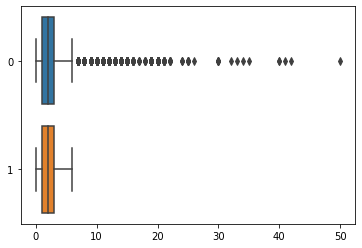

In [14]:
sns.boxplot(data=[edu_num_with, 
                  edu_num_without_iqr], 
                  orient='h')

In [16]:
#на втором графике отсутствуют выбросы, при этом квартили и медиана не сместились, такие же как на исходном графике

### Способ основанный на Z-оценке (z-score)

*Ответы на вопросы написать в отдельной ячейке типа `markdown` и/или в комментариях к коду.

1. Выбрать одну или несколько колонок содержащих выбросы. Можно использовать те, что были в IQR-способе.

1. Для каждой из этих колонок удалить выбросы, и сохранить результат в новую переменную.

1. Вычислить сколько значений при этом было удалено. Это больше или меньше, чем способом IQR?

1. Нарисовать `boxplot` на котором изображен исходный вариант для колонки и вариант без выбросов. Ниже написать об отличиях в графиках.

In [18]:
z = stats.zscore(edu_num_with)
z

array([-1.31023993, -1.31023993, -0.78620716, ...,  1.3099239 ,
        1.3099239 ,  2.35798943])

In [19]:
z_abs = np.abs(z)
z_threshold = 3
edu_num_without_z = edu_num_with[z_abs < z_threshold]
edu_num_without_z

0         0
1         0
2         1
3         1
4         2
         ..
119385    5
119386    5
119387    5
119388    5
119389    7
Name: stays_in_week_nights, Length: 117721, dtype: int64

In [20]:
len(edu_num_with) - len(edu_num_without_z)

1669

<AxesSubplot:>

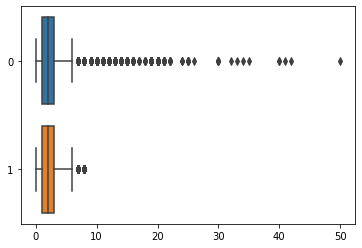

In [21]:
sns.boxplot(data=[edu_num_with, 
                  edu_num_without_z], 
            orient='h')

In [ ]:
#количество выбросов уменьшилось, при этом квартили и медиана не сместились

In [ ]:
#Способом, основанный на Z-оценке удалено 1169 значений из колонки stays_in_week_nights.
#В то время как способом IQR удалено 3354 (почти в три раза больше).
#Если сравнить получившиеся графики после удаления выбросов, то по ним тоже видно, что способом IQR удалено больше выбросов. 
#Это подтверждает, что cпособ, основанный на Z-оценке мягче, чем IQR